# Artifical Neural Networks
### Goal of lesson
- Understand Neural Networks
- How you can model other machine learning techniques
- Activation functions
- How to make simple OR function
- Different ways to calcualte weights
- What Batch sizes and Epochs are

### What is Artifical Neural Networks
- are computing systems inspired by the biological neural networks that constitute animal brains.
- Often just called Neural Networks

### Our first Neural Network
- $h(x_1, x_2) = w_0 + w_1 x_1 + w_2 x_2$

<img src="https://raw.githubusercontent.com/LearnPythonWithRune/MachineLearningWithPython/main/jupyter/final/img/neural_network.png" width="600" align="left">

### With activation function
- Step function: $g(x) = 1$ if $x \geq 0$, else $0$
- Rectified linear unit (ReLU): $g(x) = \max(0, x)$
- Sigmoid activation function: sigmoid$(x) = 1 / (1 + \exp(-x))$

More activation functions: https://keras.io/api/layers/activations/

### Model the OR function
- or$(x_1, x_2) = 0$ if $x_1$ and $x_2$ are $0$, else $1$

<img src="https://raw.githubusercontent.com/LearnPythonWithRune/MachineLearningWithPython/main/jupyter/final/img/neural_network-2.png" width="600" align="left">

### Neural Network

<img src="https://raw.githubusercontent.com/LearnPythonWithRune/MachineLearningWithPython/main/jupyter/final/img/neural_network-3.png" width="600" align="left">

### Gradient Descent
- Calculate the weights ([wiki](https://en.wikipedia.org/wiki/Gradient_descent))
- Algorithm for minimizing the loss when training neural networks

**Pseudo algorithm**
- Start with a random choice of weights
- Repeat:
    - Calculate the gradient based on all data ponits direction that will lead to decreasing loss
    - Update wieghts accorinding to the gradient
    
Tradoff
- Expensive to calculate for all data points

### Stocastic Gradient Descent
**Pseudo algorithm**
- Start with a random choice of weights
- Repeat:
    - Calculate the gradient based on one data point direction that will lead to decreasing loss
    - Update wieghts accorinding to the gradient

### Mini-Batch Gradient Descent
**Pseudo algorithm**
- Start with a random choice of weights
- Repeat:
    - Calculate the gradient based on one small batch of data ponits direction that will lead to decreasing loss
    - Update wieghts accorinding to the gradient

### Perceptron
- Only capable of learning linearly separable decision boundary.
- It cannot model the XOR function (we need multi-layer perceptrons (multi-layer neural network))
- It can take multiple inputs and map linearly to one output with an activation function.

> #### Programming Notes:
> - Libraries used
>     - [**numpy**](http://numpy.org) - scientific computing with Python ([Lecture on NumPy](https://youtu.be/BpzpU8_j0-c))
>     - [**matplotlib**](http://matplotlib.org) - visualization with Python ([Lecture on **visualization**](https://youtu.be/htIh8YHh4xs))
>     - [**tensorflow**](https://www.tensorflow.org) - end-to-end open source machine learning platform
> - Functionality and concepts used
>     - [**Sequential**](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) provides training and inference features for a model
>     - [**Input**](https://www.tensorflow.org/api_docs/python/tf/keras/Input) is used to instantiate a Keras tensor.
>     - [**Dense**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) regular densely-connected Neural Network (NN) layer.

In [1]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

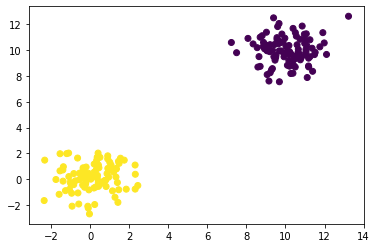

In [3]:
data = np.random.randn(200,3)
data[:100,:2]+=(10,10)
data[:100,2]=0
data[100:,2]=1
fig,ax=plt.subplots()
ax.scatter(x=data[:,0],y=data[:,1],c=data[:,2])

In [5]:
X=data[:,:2]
y=data[:,2]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

### batch size  and epoch explained
Understand how to correctly utilize Keras fit():
- **Batch size**: a set of N samples.
- **Epoch**: an arbitrary cutoff, generally defined as "one pass over the entire dataset".

In [6]:
model = Sequential()
model.add(Dense(1,input_dim=2,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [7]:
 model.fit(X_train,y_train,epochs=1000,batch_size=32,verbose=0)

In [8]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0332 - accuracy: 1.0000


[0.03319781646132469, 1.0]

7/7 [==============================] - 0s 2ms/step


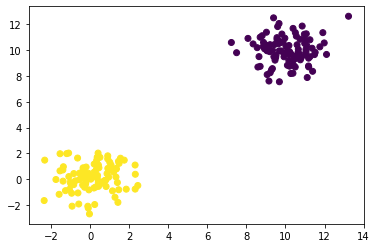

In [11]:
y_pred = model.predict(X)
y_pred = np.where(y_pred<.5,0,1)
fig,ax =plt.subplots()
ax.scatter(x=X[:,0],y=X[:,1],c=y_pred)

313/313 [==============================] - 0s 1ms/step


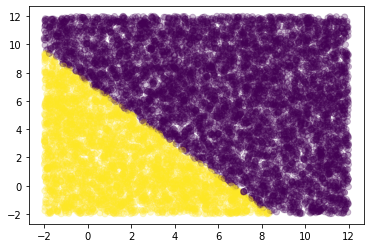

In [15]:
X_full = np.random.rand(10000,2)
X_full=X_full*(14,14)+(-2,-2)
y_full = model.predict(X_full)
y_full=np.where(y_full<0.5,0,1)
fig,ax=plt.subplots()
ax.scatter(x=X_full[:,0],y=X_full[:,1],c=y_full,alpha=0.25)